In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from contextlib import contextmanager
from IPython.display import display

sns.set()
sns.set_style("whitegrid")
color_palette = sns.color_palette('deep') + sns.color_palette('husl', 6) + sns.color_palette('bright') + sns.color_palette('pastel')

%matplotlib inline

def ndprint(a, precision=3):
    with np.printoptions(precision=precision, suppress=True):
        print(a)

In [2]:
filepath = './out/01_test.csv'

In [3]:
df = pd.read_csv(filepath, sep=';')

df.sample(5)

,epoch,experiment,loss,score
159,59,"('CartPole-v0', 100, (32,))",-17.846497,195.250
103,3,"('CartPole-v0', 100, (32,))",15.216348,41.875
52,52,"('CartPole-v0', 100, (32,))",9.555886,148.000
333,33,"('CartPole-v0', 100, (32,))",-7.709693,200.000
497,97,"('CartPole-v0', 100, (32,))",-4.029847,200.000


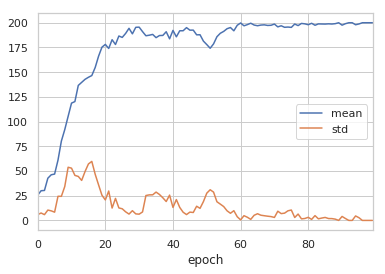

In [4]:
for name, sdf in df.groupby(by=['experiment', 'epoch'])['score'].agg(['mean', 'std']).groupby(level=0):
    sdf = sdf.loc[name]
    sdf.plot()

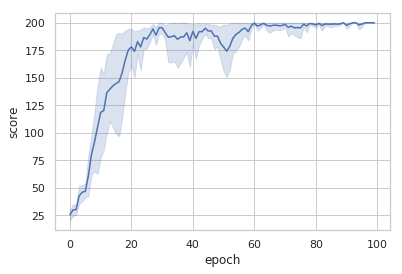

In [8]:
for name, sdf in df.groupby(by=['experiment']):
    sns.lineplot(x='epoch', y='score', data=sdf)
    

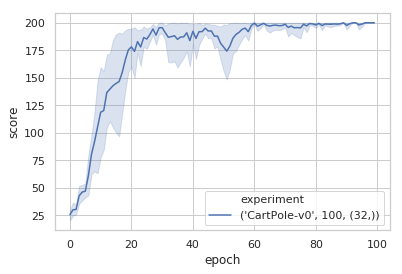

In [9]:
sns.lineplot(x='epoch', y='score', hue='experiment', data=df)